In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , FunctionTransformer
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score

In [2]:
#df_desc = pd.read_csv("data/key.csv", index_col = 0)
y = pd.read_csv("data/Training data target.csv")
X= pd.read_csv("data/Training data.csv")

In [3]:
#df_desc
#Not needed now

In [4]:
#Merging data to get a full picture
df = X.merge(y,on="id")

In [5]:
df["amount_tsh"].value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
6300.0          1
120000.0        1
138000.0        1
350000.0        1
59.0            1
Name: amount_tsh, Length: 98, dtype: int64

In [6]:
df.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [7]:
df.drop("id",axis=1, inplace= True)

In [8]:
df

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,5/3/2013,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,4700.0,5/7/2011,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,0.0,4/11/2011,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,0.0,3/8/2011,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15  wa

In [53]:
df["public_meeting"].apply(lambda True: 1, False : 0, NaN : -1)

SyntaxError: invalid syntax (Temp/ipykernel_4988/13362834.py, line 1)

In [54]:
df["permit"]

0        False
1         True
2         True
3         True
4         True
         ...  
59395     True
59396     True
59397    False
59398     True
59399     True
Name: permit, Length: 59400, dtype: object

In [51]:
df.groupby("amount_tsh")["status_group"].value_counts().sort_values(ascending= False)[:50]

KeyError: 'amount_tsh'

In [47]:
df["status_group"].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [50]:
df["installer"].value_counts()

DWE                17402
Government          1825
RWE                 1206
Commu               1060
DANIDA              1050
                   ...  
Wizara  ya maji        1
TWESS                  1
Nasan workers          1
R                      1
SELEPTA                1
Name: installer, Length: 2145, dtype: int64

In [49]:
df.groupby("installer")["status_group"].value_counts().sort_values(ascending= False)[:50]

installer             status_group           
DWE                   functional                 9433
                      non functional             6347
                      functional needs repair    1622
Government            non functional             1034
RWE                   non functional              765
Commu                 functional                  724
DANIDA                functional                  542
CES                   functional                  538
Government            functional                  535
Hesawa                functional                  475
Central government    non functional              450
0                     functional                  445
DANID                 functional                  431
DANIDA                non functional              425
KKKT                  functional                  422
                      non functional              414
Community             functional                  386
TCRS                  non functional

As we can seem, theres 39 variables in our dataset, there are some null values that will need to be addressed later. and there are quite a few categorical variables

We will create count plots to see how each variable effects the status of the well. 

In [11]:
df.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [12]:
#Creating function to plot basic countplot for each column
def count_plot(col):
    plt.figure(figsize=(15,8))
    ax= sns.countplot(x=col, hue="status_group", data=df)

In [13]:
df["payment"].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [14]:
df["payment_type"].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [15]:
df["payment"].isna().sum()

0

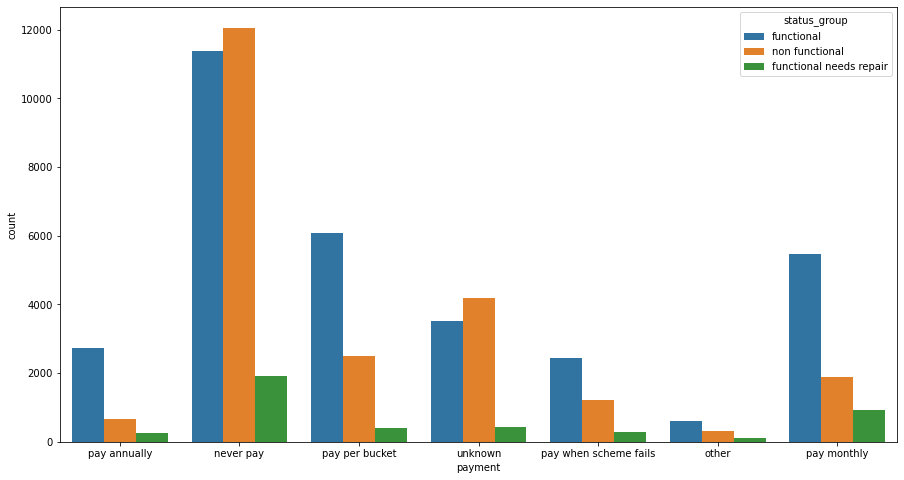

In [21]:
count_plot("payment")

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   funder                 55765 non-null  object
 1   gps_height             59400 non-null  int64 
 2   installer              55745 non-null  object
 3   wpt_name               59400 non-null  object
 4   basin                  59400 non-null  object
 5   region_code            59400 non-null  int64 
 6   district_code          59400 non-null  int64 
 7   population             59400 non-null  int64 
 8   public_meeting         56066 non-null  object
 9   permit                 56344 non-null  object
 10  construction_year      59400 non-null  int64 
 11  extraction_type_class  59400 non-null  object
 12  management             59400 non-null  object
 13  payment_type           59400 non-null  object
 14  quality_group          59400 non-null  object
 15  quantity           

In [ ]:
#count_plot("payment_type")


In [ ]:
#df["water_quality"].value_counts()

In [ ]:
#df["quality_group"].value_counts()

In [ ]:
#count_plot("water_quality")

In [ ]:
#count_plot("quality_group")

In [ ]:
#df["source"].value_counts()

In [ ]:
#df["source_type"].value_counts()

In [ ]:
#df["source_class"].value_counts()

In [ ]:
#count_plot("source")

In [ ]:
#count_plot("source_type")

In [ ]:
#count_plot("source_class")

In [ ]:
#df["quantity"].value_counts() 

In [22]:
#df["quantity_group"].value_counts() 

In [23]:
df["payment"].isna().sum()

0

In [24]:
df["payment_type"].isna().sum()

0

In [25]:
df["water_quality"].isna().sum()

0

In [26]:
df["quality_group"].isna().sum()

0

In [27]:
df["quantity"].isna().sum()

0

In [28]:
df["quantity_group"].isna().sum()

0

In [29]:
df["source"].isna().sum()

0

In [30]:
df["source_type"].isna().sum()

0

In [31]:
df["source_class"].isna().sum()

0

In [32]:
df= df.drop(["amount_tsh", "num_private","date_recorded","longitude", "latitude","waterpoint_type_group", "subvillage", "region" , "lga", "ward", "recorded_by", "scheme_management","scheme_name", "extraction_type",
            "extraction_type_group","management_group", "payment", "water_quality","quantity_group", "source_type"], axis=1)

In [34]:
#saving as csv just in case
df.to_csv("data/data_clean.csv")

In [ ]:
#df_clean = df.drop(["funder", "installer","public_meeting","permit"], axis=1)

In [ ]:
df_clean.info()

In [ ]:
df_clean['status_group']


In [ ]:
y = df_clean[["status_group"]]
X = df_clean.drop("status_group", axis=1)

In [ ]:
df_clean.info()

In [ ]:
X = df_clean[['population', 'gps_height']]

y = df_clean['status_group']


In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y)

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [ ]:

rf_base = RandomForestClassifier(random_state=1)
rf_base.fit(X_train, y_train)


In [ ]:
#Don't need yet
from sklearn.metrics import plot_confusion_matrix,classification_report


In [ ]:
result = rf_base.score(X_test, y_test)
predicted = rf_base.predict(X_test)
report = classification_report(y_test, predicted) 
print(result)
print(report)


In [ ]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


In [ ]:
# Choose the type of classifier. 
rf_base2 = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score(average= "weighted"))

# Run the grid search- net yet
#grid_obj = GridSearchCV(rf_base2, parameters, scoring=acc_scorer,cv=5)
#grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
#rf_base3 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
#rf_base3.fit(X_train, y_train)


In [ ]:
# Choose the type of classifier. 
rf_base2 = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_base2, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_base3 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_base3.fit(X_train, y_train)


In [ ]:
parameters = {"n_estimators": [150,200],
    "min_samples_leaf": np.arange(5, 10),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

In [ ]:
Things to change- + trees
Max depth 2-5
Min # per leaf 10, 20
N_jobs 
